<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/MedicalInsurancePayout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [ ]:
!kaggle datasets download -d harshsingh2209/medical-insurance-payout

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 12.1MB/s]


In [ ]:
!unzip '/content/medical-insurance-payout.zip' && rm '/content/medical-insurance-payout.zip'

Archive:  /content/medical-insurance-payout.zip
  inflating: expenses.csv            


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/expenses.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
np.round(data.describe(),2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [ ]:
print("sex: ",data['sex'].unique(),'\n',"smoker: " ,data['smoker'].unique(),'\n',"Region: ",data['region'].unique())

sex:  ['female' 'male'] 
 smoker:  ['yes' 'no'] 
 Region:  ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
data['sex'] = data['sex'].map({'female':1, 'male':0}) 
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

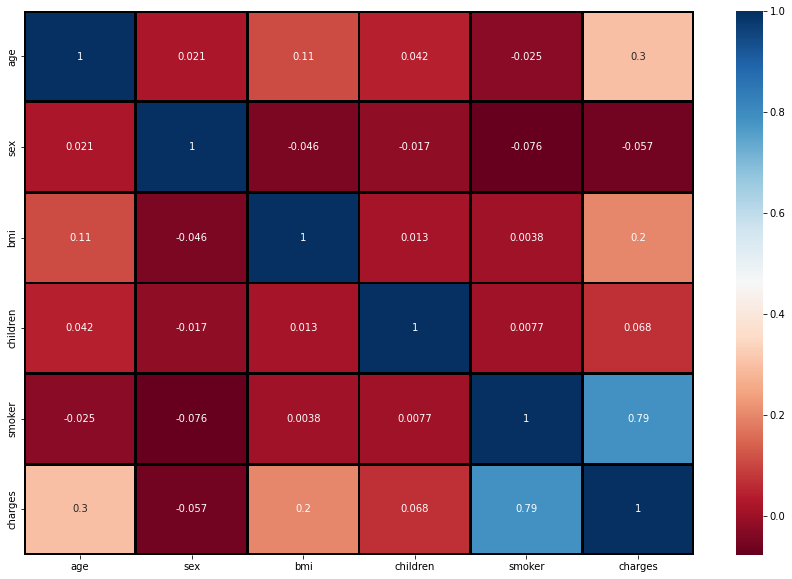

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), linecolor='black', linewidths='2', annot=True, cmap='RdBu')


In [ ]:
px.line(data,y ='charges')

# **Machine Learning Models**

In [ ]:
x =np.array(data[['age','bmi','smoker']])
y = np.array(data['charges'])

In [ ]:
print(x.shape, y.shape)

(1338, 3) (1338,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
print(x_train.shape,y_train.shape)

(1070, 3) (1070,)


In [ ]:
from sklearn.linear_model import LinearRegression

#features 'age'(18-64),'bmi'(15.96-53.13),'smoker(0-1)'

features = np.array([[49,41.47,0]])

reg = LinearRegression()
reg.fit(x_train,y_train)
lr = reg.predict(features)
lr

array([14541.18881933])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#features 'age'(18-64),'bmi'(15.96-53.13),'smoker(0-1)'

features = np.array([[49,41.47,0]])

rrf = RandomForestRegressor()
rrf.fit(x_train,y_train)
rf = rrf.predict(features)
rf

array([9995.7923205])

In [ ]:
from sklearn.svm import SVR 

#features 'age'(18-64),'bmi'(15.96-53.13),'smoker(0-1)'

features = np.array([[49,41.47,0]])

rsvr = SVR()
rsvr.fit(x_train,y_train)
SvR = rsvr.predict(features)
SvR

array([9580.97139249])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#features 'age'(18-64),'bmi'(15.96-53.13),'smoker(0-1)'

features = np.array([[49,41.47,0]])

rkn = KNeighborsRegressor()
rkn.fit(x_train, y_train)
kn = rkn.predict(features)
kn

array([24693.12089])

In [ ]:
data.iloc[344,]

age                 49
sex                  1
bmi              41.47
children             4
smoker               0
region       southeast
charges     10977.2063
Name: 344, dtype: object